In [3]:
%matplotlib inline
import scrublet as scr
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import os

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rc('font', size=14)
plt.rcParams['pdf.fonttype'] = 42

In [22]:
SAMPLE='RCMB56-pdx'

In [23]:
# Get data
if SAMPLE == 'RCMB56-ht':
    input_dir = '../RCMB56-ht/cellranger-2.0.0/outs/filtered_feature_bc_matrix'
elif SAMPLE == 'RCMB56-pdx':
    input_dir = '../RCMB56-pdx/RCMB56-pdx/outs/filtered_feature_bc_matrix'
counts_matrix = scipy.io.mmread(input_dir + '/matrix.mtx').T.tocsc()
genes = np.array(scr.load_genes(input_dir + '/features.tsv', delimiter='\t', column=1))

# Remove ATAC features
def find_genes(string):
    if ':' in string:
        return False
    else:
        return True
v_find_genes = np.vectorize(find_genes)
genes = genes[v_find_genes(genes)]
counts_matrix = counts_matrix[:,v_find_genes(genes)]

print('Counts matrix shape: {} rows, {} columns'.format(counts_matrix.shape[0], counts_matrix.shape[1]))
print('Number of genes in gene list: {}'.format(len(genes)))

Counts matrix shape: 12869 rows, 36601 columns
Number of genes in gene list: 36601


In [24]:
scrub = scr.Scrublet(counts_matrix, expected_doublet_rate=0.06)
doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2, 
                                                          min_cells=3, 
                                                          min_gene_variability_pctl=85, 
                                                          n_prin_comps=30)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.56
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.0%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 25.0%
Elapsed time: 35.1 seconds


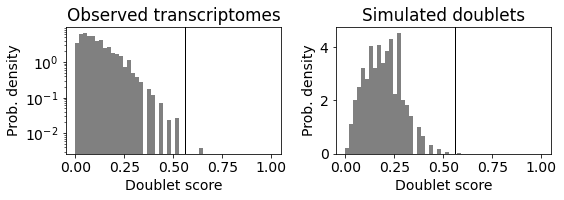

In [25]:
scrub.plot_histogram();

